# Estimation analysis

In [1]:
from model_tools import TS, Special_TS
from model_tools import load_data, load_hdf
from model_tools import Visual 
from model_tools import cut, cut_dict 

In [2]:
plot = Visual.plot
curve = Visual.curve
whiskers = Visual.whiskers
histogram = Visual.histogram
compare = Visual.compare
panel = Visual.panel

In [3]:
%cd "d:\moje_dokumenty\Desktop\diplomka\model\data\hdf_tarrifs"

d:\moje_dokumenty\Desktop\diplomka\model\data\hdf_tarrifs


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [4]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [5]:
panels = ("main", "sentiments", "int_trade", "yearly", "money", "labor", "profits",  "industry", "cons", "cycles")

In [6]:
pans = {ind: pan for ind, pan in enumerate(panels)}

# trade costs estimation

[0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 1.3]    

in BB choose 0, 0.2 and 0.7, generally make statisitical analysis on correlation of business cycles synchronization and trade ratios (trade ratios being dependent on quotas and costs)

in BS, small country cycles follow B cycles, at 0.5 and higher there are no cycles anymore, choose 0, 0.2 and 0.4

exports of S are not very responsive to costs, especially on above 0.5 level, exports in B are declining -> ever bigger trade balances for S (clear from 0.05), prices in S decline, real wages increase, profits decline, alhough massive bankruptcies only from 1 level

in BS, pegged exchange rate keeps synchronized cycles alive for even high values of costs

In [9]:
for s in range(1,11):
    path = '2*costs_BB_est_' + str(s) + '.h5'
    exec("costs_BB_est_data_" + str(s)+ ", costs_BB_est_files_" + str(s)+ ", costs_BB_est_pars_" + str(s)+
         " = load_hdf(path, condition = None,  ret_parameters = True)" )

In [10]:
costs_BB_est_data = []
for s in range(1,11):
    exec("costs_BB_est_data.append(costs_BB_est_data_" + str(s)+ "[0] ) " )   # first simulation runs

In [11]:
for s in range(1,11):
    path = '2*costs_BS_est_' + str(s) + '.h5'
    exec("costs_BS_est_data_" + str(s)+ ", costs_BS_est_files_" + str(s)+ ", costs_BS_est_pars_" + str(s)+
         " = load_hdf(path, condition = None,  ret_parameters = True)" )

In [12]:
costs_BS_est_data = []
for s in range(1,11):
    exec("costs_BS_est_data.append(costs_BS_est_data_" + str(s)+ "[0] ) " )   # first simulation runs

In [13]:
for s in range(1,4):
    path = '2*costs_BS_est_det_' + str(s) + '.h5'
    exec("costs_BS_est_det_data_" + str(s)+ ", costs_BS_est_det_files_" + str(s)+ ", costs_BS_est_det_pars_" + str(s)+
         " = load_hdf(path, condition = None,  ret_parameters = True)" )

In [14]:
costs_BS_est_det_data = []
for s in range(1,4):
    exec("costs_BS_est_det_data.append(costs_BS_est_det_data_" + str(s)+ "[0] ) " )   # first simulation runs

In [15]:
for s in range(6,11):
    path = '2*costs_BS_est_pegged_' + str(s) + '.h5'
    exec("costs_BS_est_pegged_data_" + str(s)+ ", costs_BS_est_pegged_files_" + str(s)+ ", costs_BS_est_pegged_pars_" + str(s)+
         " = load_hdf(path, condition = None,  ret_parameters = True)" )
    
costs_BS_est_pegged_data = []
for s in range(6,11):
    exec("costs_BS_est_pegged_data.append(costs_BS_est_pegged_data_" + str(s)+ "[0] ) " )   # first simulation runs

In [16]:
pans

{0: 'main',
 1: 'sentiments',
 2: 'int_trade',
 3: 'yearly',
 4: 'money',
 5: 'labor',
 6: 'profits',
 7: 'industry',
 8: 'cons',
 9: 'cycles'}

In [65]:
j = 0

In [63]:
j += 1
j

6

In [9]:
i = 0

In [20]:
i += 1
i

3

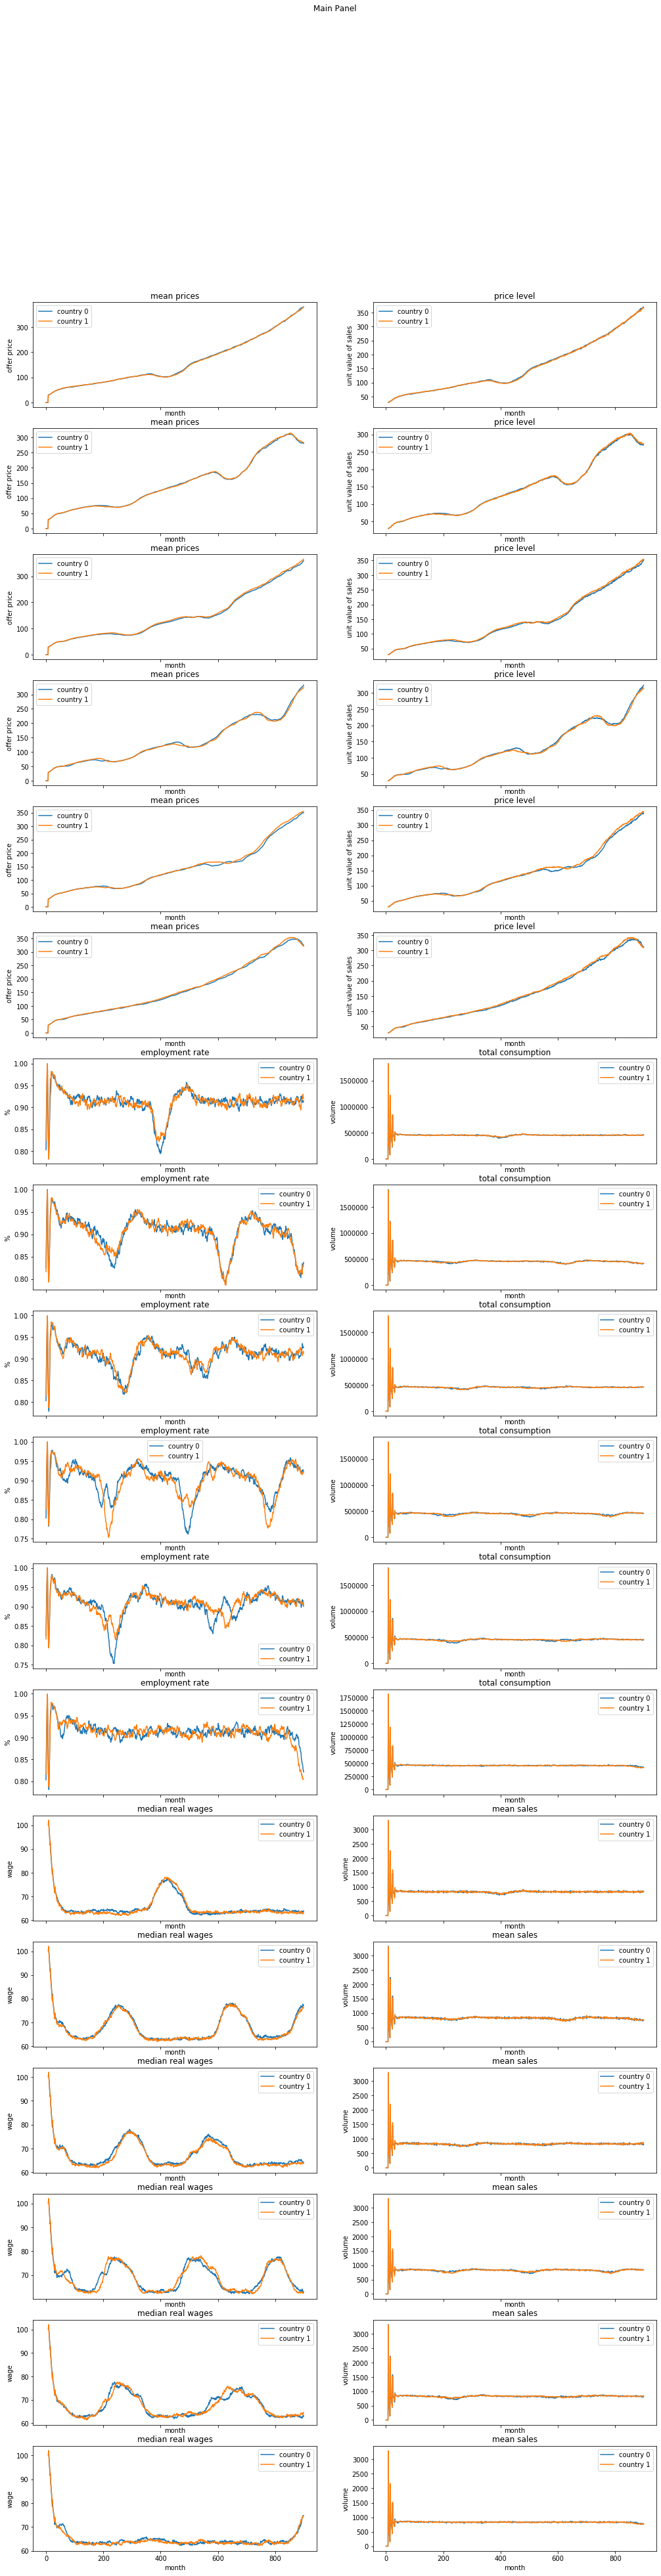

In [35]:
panel(*costs_BB_est_data_4,*costs_BB_est_data_5, name = panels[j])

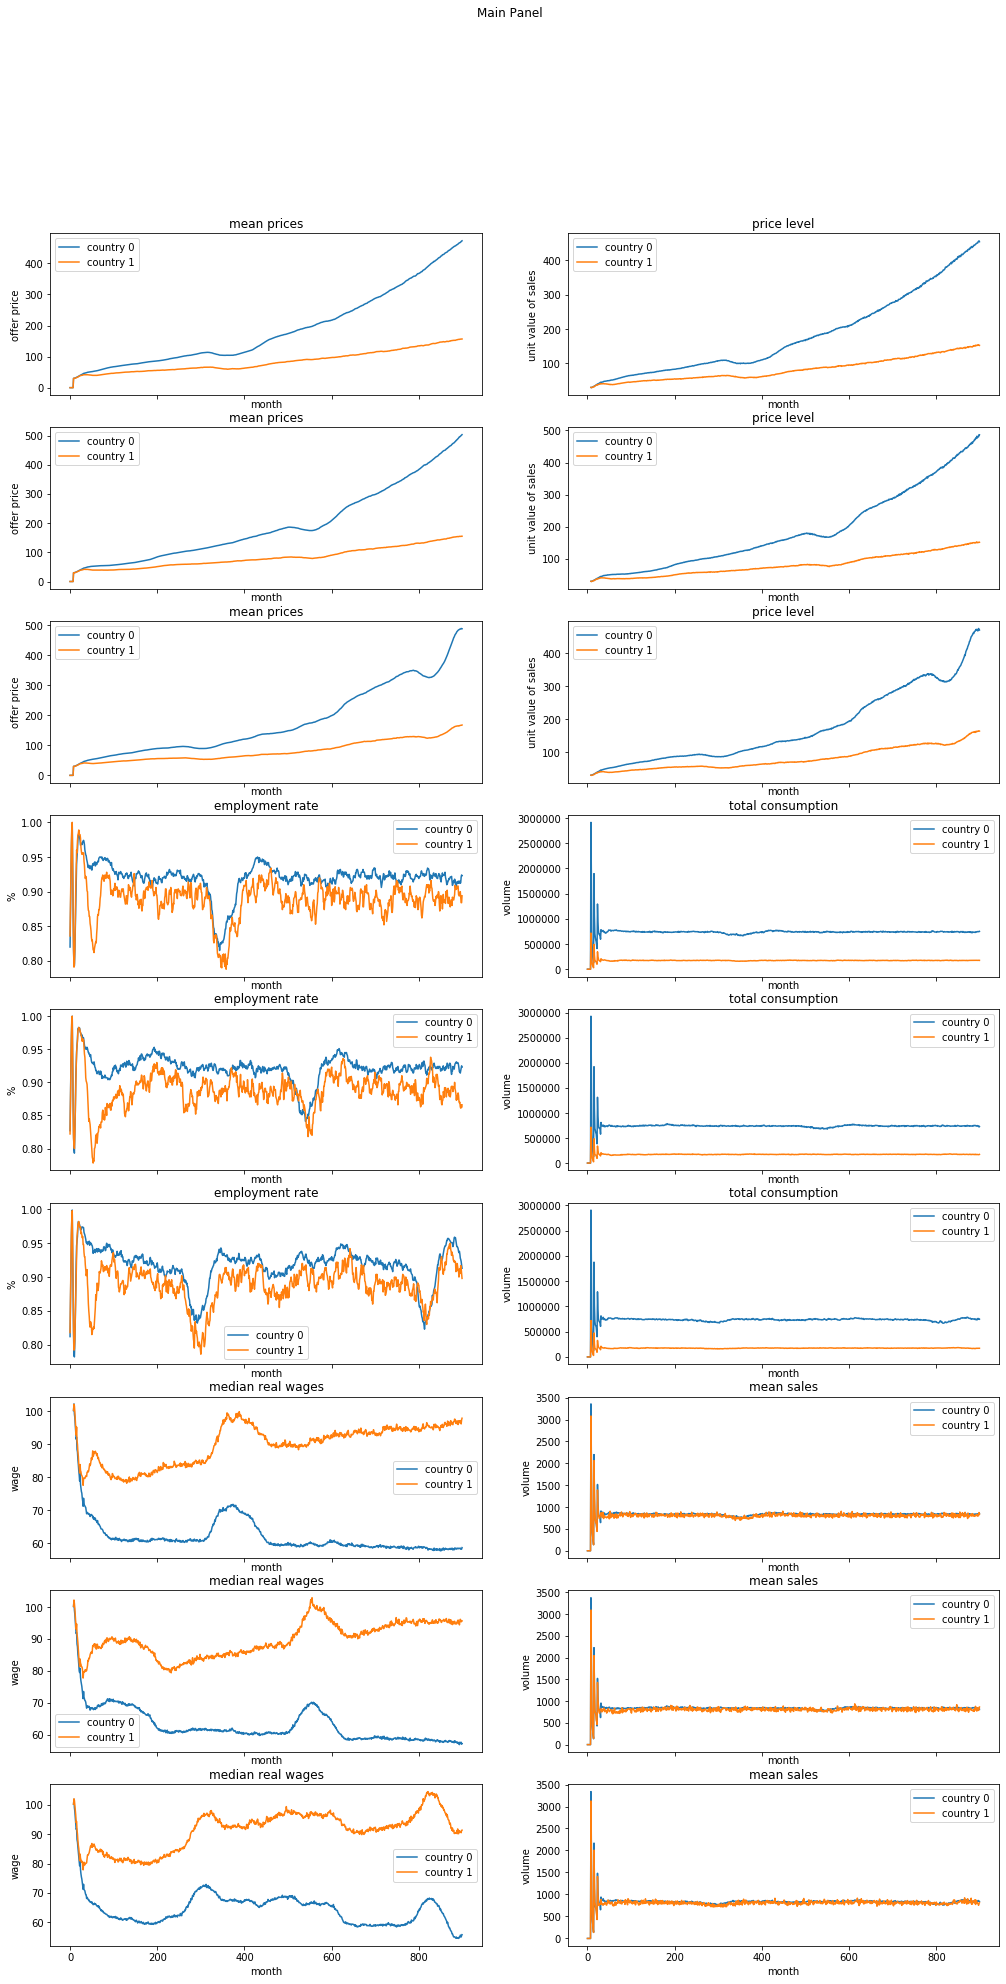

In [30]:
panel(*costs_BS_est_det_data_2, name = panels[j])

In [28]:
costs_BS_est_det_pars_2[0]

{'period': ['current period = 899'],
 'no_countries': ['number of countries = 2'],
 'global_bank': ['if there is only 1 global bank = False'],
 'ns': ['number of HSHs = [8000, 2000]'],
 'ms': ['number of firms = [880, 220]'],
 'wage_resist': ['hsh - wage resistance in unemployment = [12, 12]'],
 'wage_flex': ['hsh - wage flexibility = [0.05, 0.05]'],
 'prop_to_save_O': ['hsh - optimistic saving target = 0.15'],
 'prop_to_save_P': ['hsh - pessimistic saving target = 0.2'],
 'cons_of_excess_savings': ['hsh - rate of cons. of excess savings = 0.5'],
 'l_providers': ['hsh - number of firms to be considered on labor market = 10'],
 'providers': ['hsh - number of firms to be considered on goods market = 15'],
 'K': ['f - number of machines = 10'],
 'productivity': ['f - machine productivity = 100'],
 'production_time': ['f - length of production = 8'],
 'inv_normal': ['f - periods of full prod. for targeted inventories = 2'],
 'price_flex': ['f - adjustment parameter = 0.05'],
 'targeted_vac

In [18]:
j=0

In [90]:
j+=1
j

3

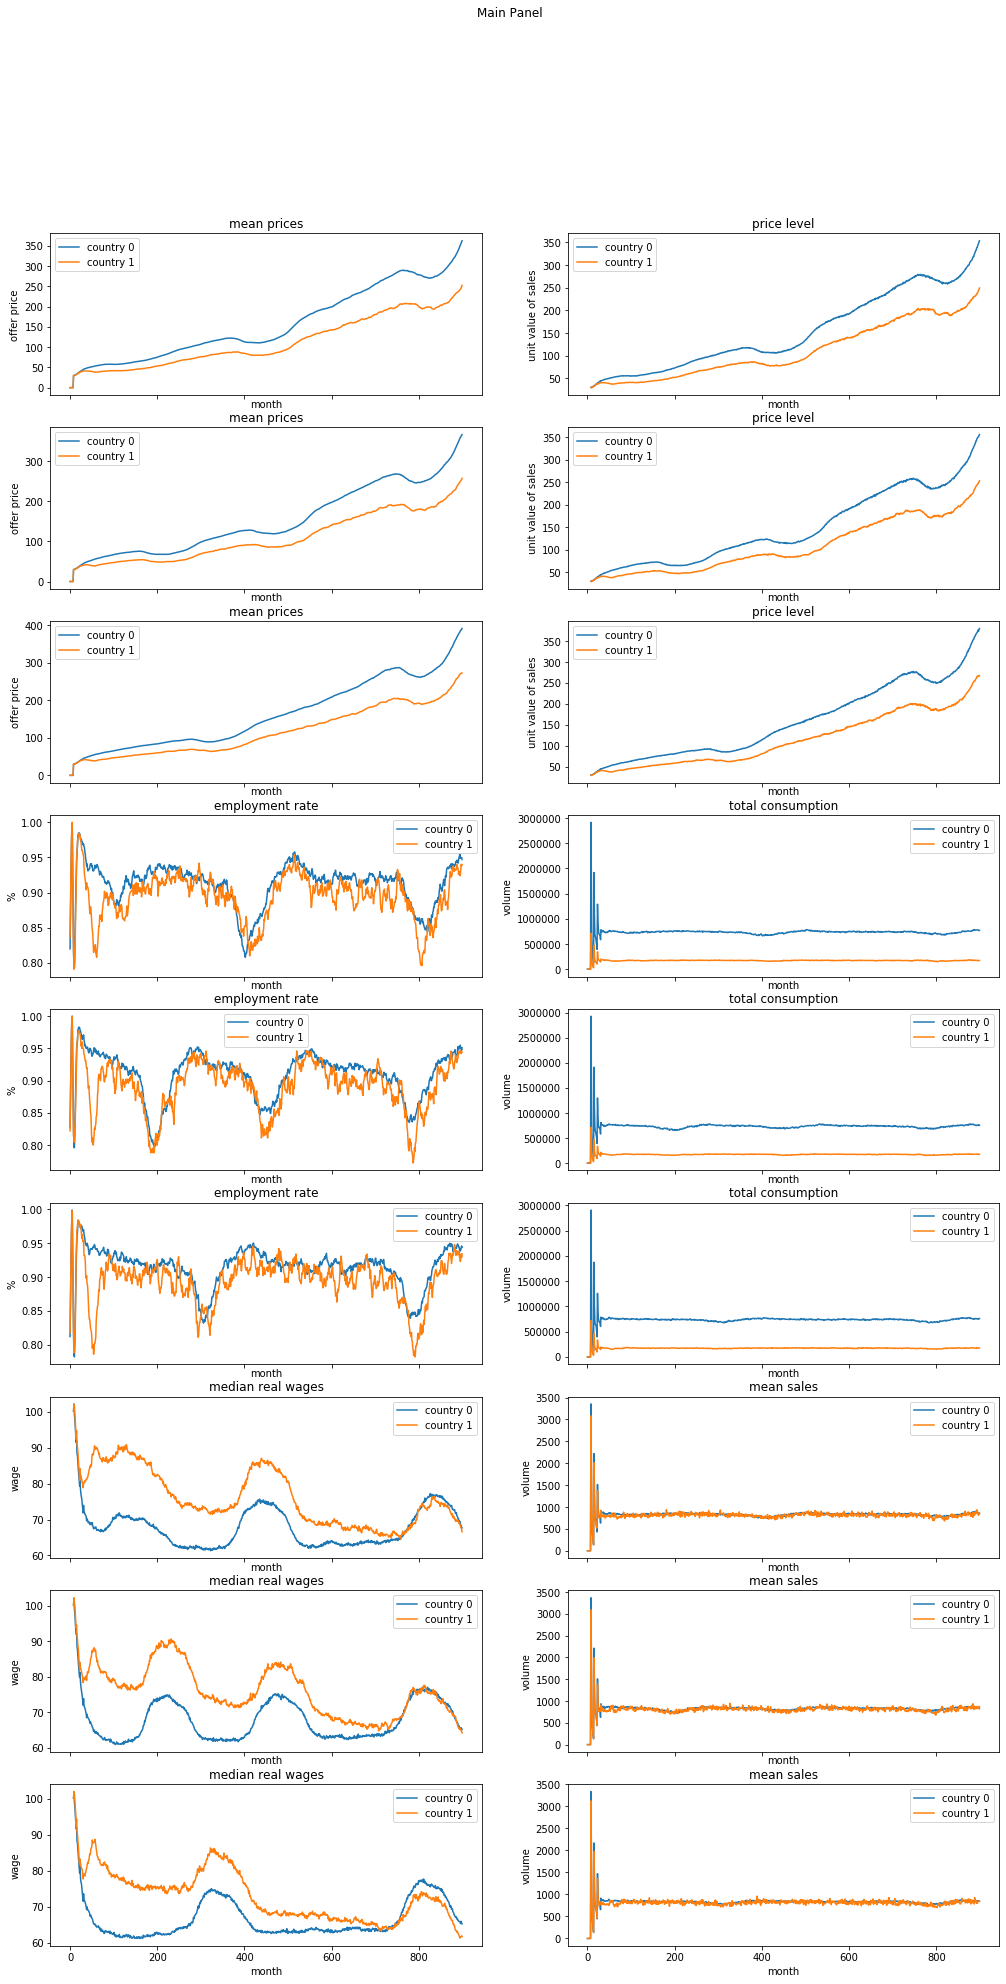

In [25]:
panel(*costs_BS_est_pegged_data_7, name = panels[j])

# quotas

 [0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1]
 
choose quotas 0.05, 0.2/0.3, and 1; at 0.2 they are only somewhat synchronized, at 0.3 there are more clear signs of synchronization
 
in BB base-alt, synchronization kicks in slower, really synchronized only at 0.7 level, not much difference across different quotas parametrizations at under 0.5 levels

In [31]:
for s in range(1,10):
    path = '2*quotas_BB_est_' + str(s) + '.h5'
    exec("quotas_BB_est_data_" + str(s)+ ", quotas_BB_est_files_" + str(s)+ ", quotas_BB_est_pars_" + str(s)+
         " = load_hdf(path, condition = None,  ret_parameters = True)" )
    
quotas_BB_est_data = []
for s in range(1,10):
    exec("quotas_BB_est_data.append(quotas_BB_est_data_" + str(s)+ "[0] ) " )   # first simulation runs

In [32]:
for s in range(1,10):
    path = '2*quotas_BS_est_' + str(s) + '.h5'
    exec("quotas_BS_est_data_" + str(s)+ ", quotas_BS_est_files_" + str(s)+ ", quotas_BS_est_pars_" + str(s)+
         " = load_hdf(path, condition = None,  ret_parameters = True)" )
    
quotas_BS_est_data = []
for s in range(1,10):
    exec("quotas_BS_est_data.append(quotas_BS_est_data_" + str(s)+ "[0] ) " )   # first simulation runs

In [33]:
for s in range(1,10):
    path = '2*quotas_2_BB_est_' + str(s) + '.h5'
    exec("quotas_2_BB_est_data_" + str(s)+ ", quotas_2_BB_est_files_" + str(s)+ ", quotas_2_BB_est_pars_" + str(s)+
         " = load_hdf(path, condition = None,  ret_parameters = True)" )
    
quotas_2_BB_est_data = []
for s in range(1,10):
    exec("quotas_2_BB_est_data.append(quotas_2_BB_est_data_" + str(s)+ "[0] ) " )   # first simulation runs

In [7]:
pans

{0: 'main',
 1: 'sentiments',
 2: 'int_trade',
 3: 'yearly',
 4: 'money',
 5: 'labor',
 6: 'profits',
 7: 'industry',
 8: 'cons',
 9: 'cycles'}

In [56]:
j = 0

In [74]:
j += 1
j

9

In [67]:
i = 0

In [66]:
i += 1
i

1

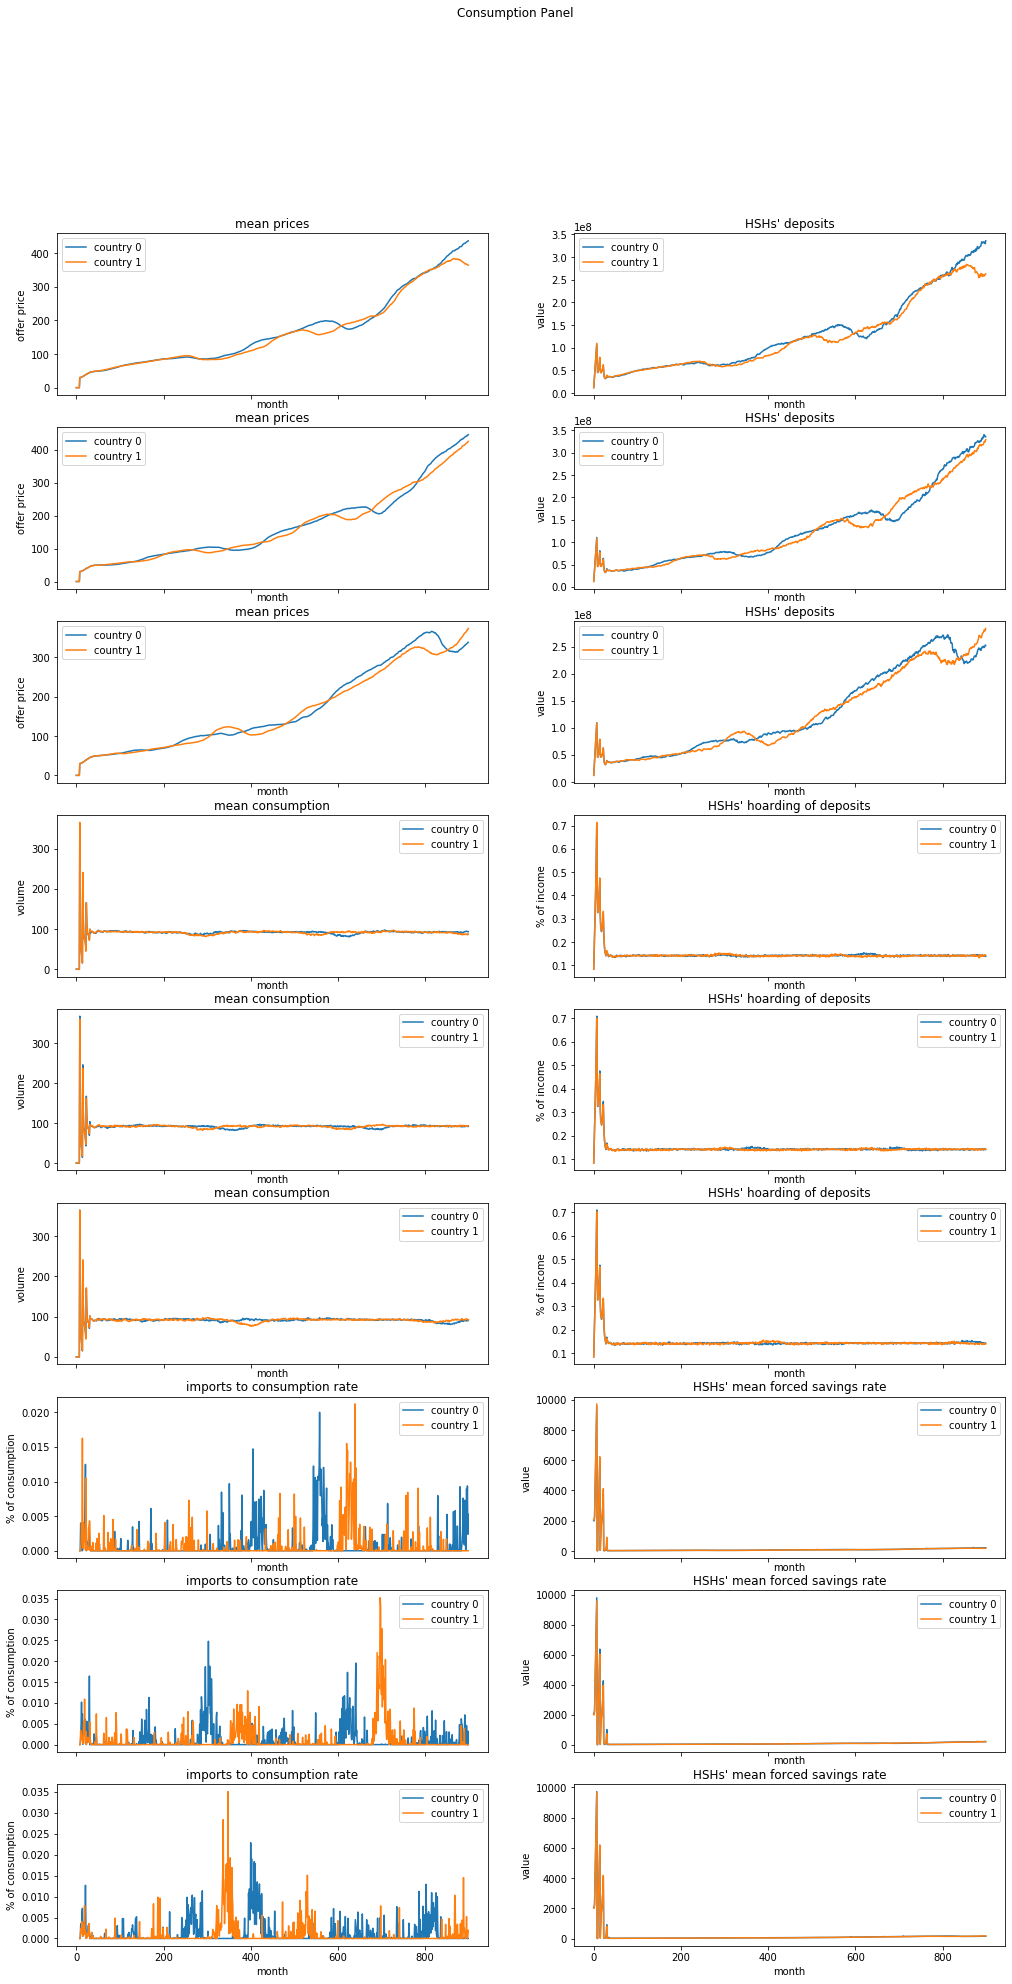

In [73]:
panel(*quotas_BB_est_data_3, name = panels[j])

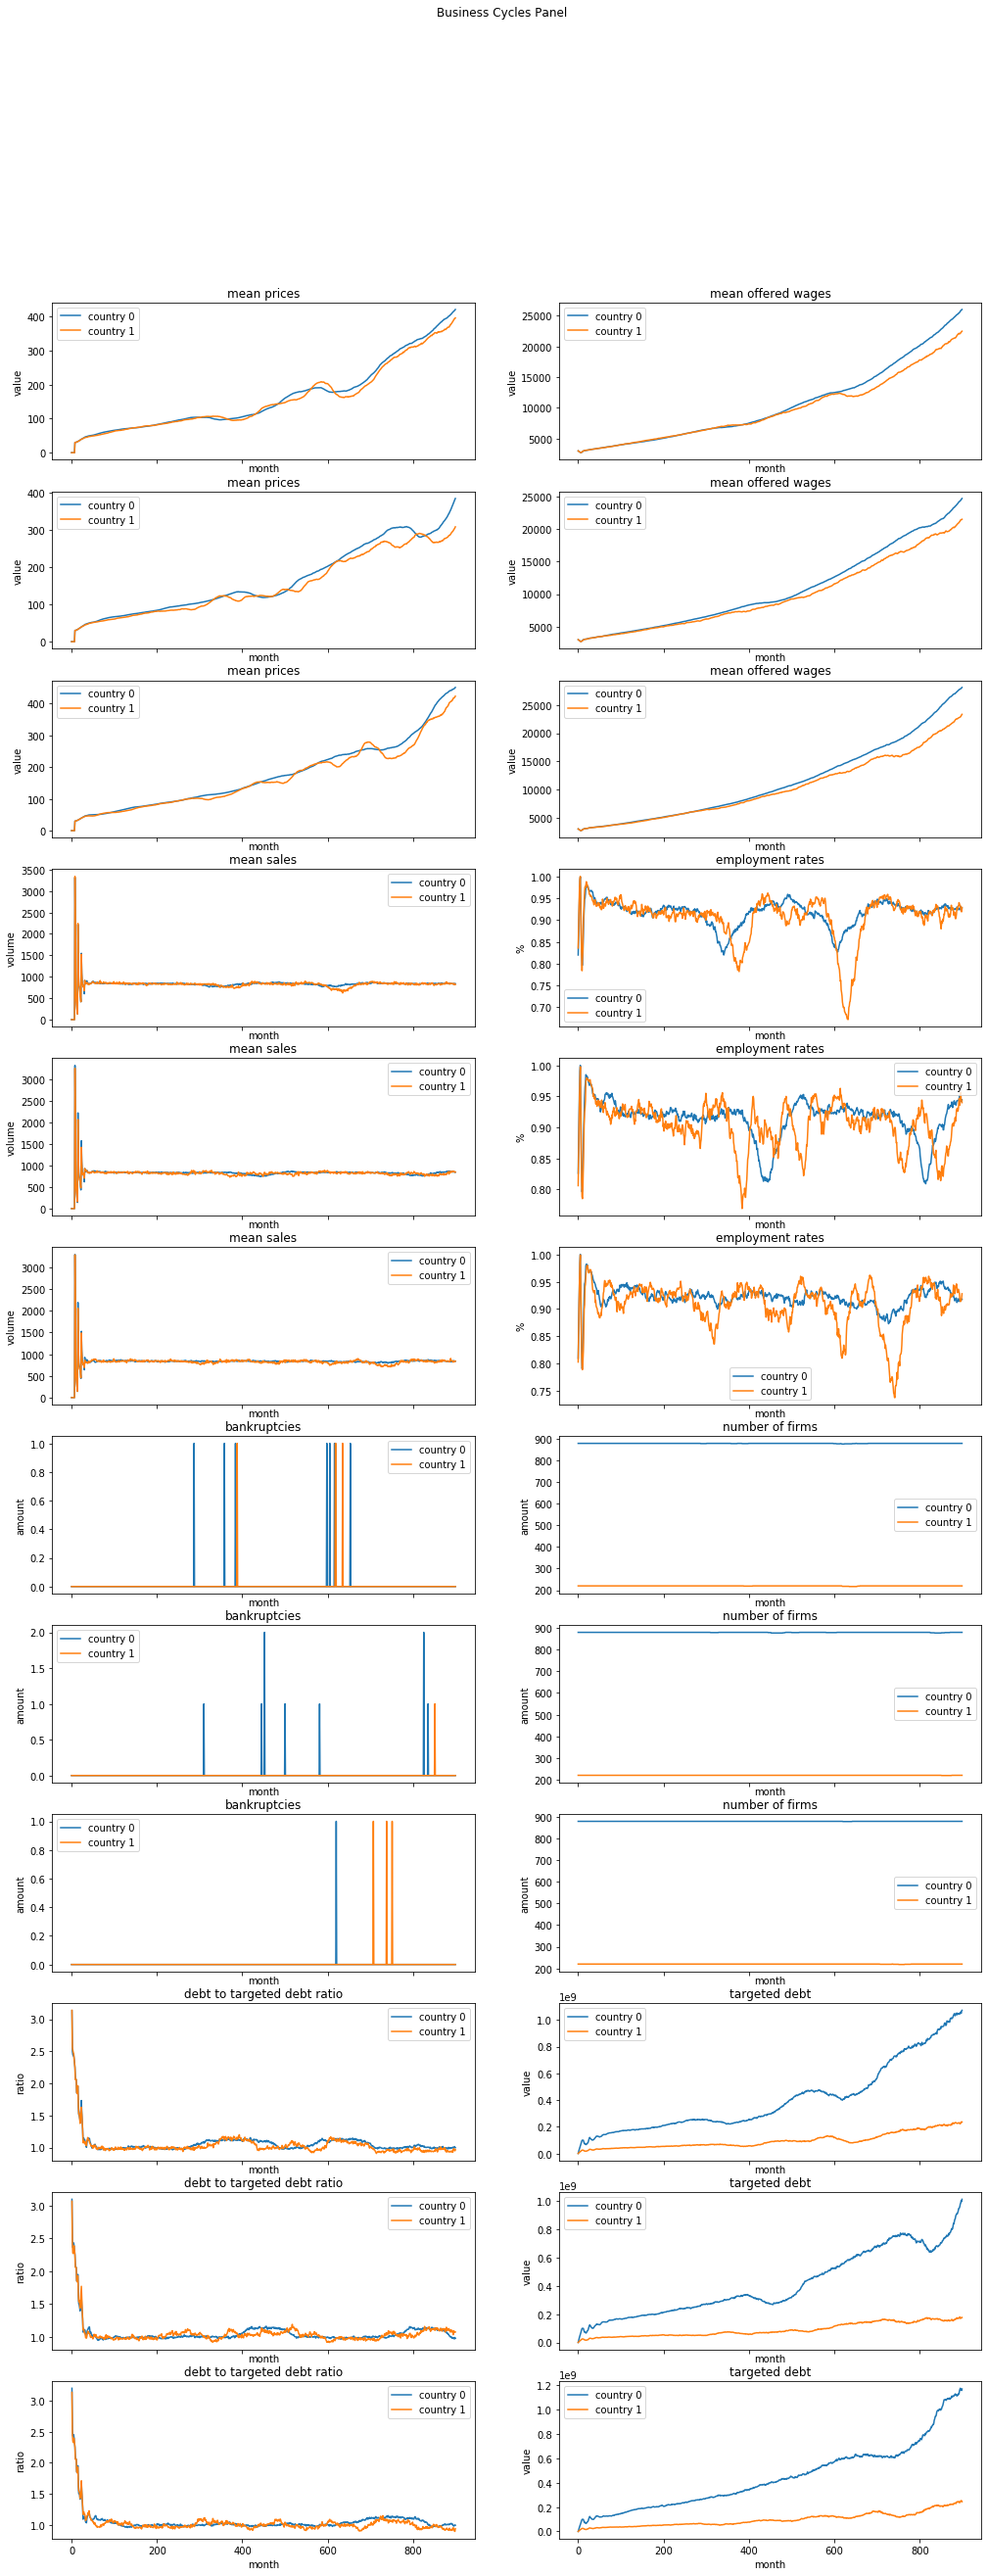

In [75]:
panel(*quotas_BS_est_data_5, name = panels[j])

In [49]:
quotas_2_BB_est_pars_8[0]

{'period': ['current period = 899'],
 'no_countries': ['number of countries = 2'],
 'global_bank': ['if there is only 1 global bank = False'],
 'ns': ['number of HSHs = [5000, 5000]'],
 'ms': ['number of firms = [550, 550]'],
 'wage_resist': ['hsh - wage resistance in unemployment = [12, 8]'],
 'wage_flex': ['hsh - wage flexibility = [0.05, 0.08]'],
 'prop_to_save_O': ['hsh - optimistic saving target = 0.15'],
 'prop_to_save_P': ['hsh - pessimistic saving target = 0.2'],
 'cons_of_excess_savings': ['hsh - rate of cons. of excess savings = 0.5'],
 'l_providers': ['hsh - number of firms to be considered on labor market = 10'],
 'providers': ['hsh - number of firms to be considered on goods market = 15'],
 'K': ['f - number of machines = 10'],
 'productivity': ['f - machine productivity = 100'],
 'production_time': ['f - length of production = 8'],
 'inv_normal': ['f - periods of full prod. for targeted inventories = 2'],
 'price_flex': ['f - adjustment parameter = 0.05'],
 'targeted_vaca

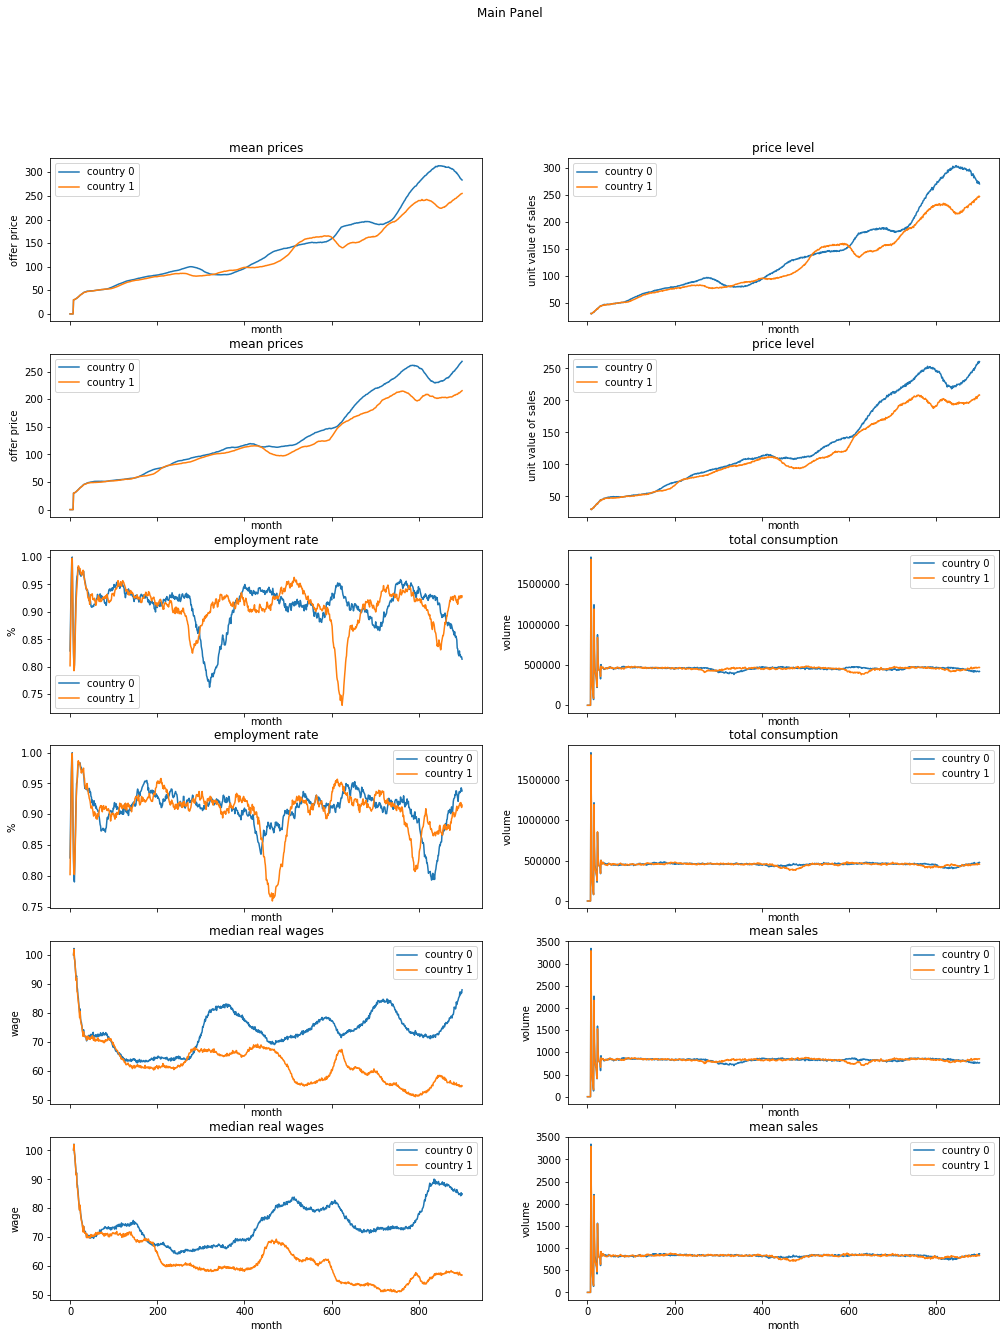

In [55]:
panel(quotas_2_BB_est_data_3[1], quotas_2_BB_est_data_7[1], name = panels[j])